In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport
from google.cloud import bigquery


In [4]:
%matplotlib inline
sns.set_theme(style="whitegrid", palette="muted")
#“rocket,” “mako,” “flare,” “crest,” “Spectral,” etc.

In [49]:
client = bigquery.Client(project="correlion")

query = """
    SELECT *
    FROM `correlion.olist_clean.order_reviews_aspect_geo`
"""

df = client.query(query).to_dataframe()

df.head()

/Users/d.lucker/Code/correlion/airflow_demo/venv/lib/python3.9/site-packages/google/auth/_default.py:76: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK without a quota project. You might receive a "quota exceeded" or "API not enabled" error. See the following page for troubleshooting: https://cloud.google.com/docs/authentication/adc-troubleshooting/user-creds. 
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)
/Users/d.lucker/Code/correlion/airflow_demo/venv/lib/python3.9/site-packages/google/cloud/bigquery/table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


,product_id,review_id,review_score,product_category_name_en,review_comment_message,review_comment_message_en,review_year,review_month,review_month_date,city,delivery_score,product_quality_score,customer_service_score,refund_process_score,packaging_condition_score
0,0b148966d6d89f4ab8fd3472df4a8648,168863de0e60d3df41d90a063fba7f93,2,home_construction,"bom dia\no produto veio danificado, como faço ...","Good morning The product arrived damaged, how ...",2017,9,2017-09-01,suzano,0.0,-0.5,0.5,0.0,-1.0
1,ebad2408485504e930678ed1af88790f,46667e6f5c3949f1854dc00d1edbc969,1,dvds_blu_ray,GOSTARIA DE SABER O QUE HOUVE. COMPRO HA ANOS ...,I WOULD LIKE TO KNOW WHAT HAPPENED. I HAVE BEE...,2017,9,2017-09-01,brasilia,0.0,0.0,0.0,0.0,0.0
2,d6160fb7873f184099d9bc95e30376af,5e645f13a7747cce3b9b8cd04aea72bd,2,computers,Loja excelente mas produto com defeito! Aguard...,Excellent store but defective product! Waiting...,2017,9,2017-09-01,bauru,0.0,-0.5,0.0,0.0,0.0
3,482c25dc8512547962854dfff5ac057b,a7aa38eca8d2ea1641852cfa1b09ad42,1,home_construction,targaryen não entregou os produtos completos. ...,Targaryen did not deliver the complete product...,2017,9,2017-09-01,itumbiara,0.0,0.0,0.0,0.0,0.0
4,3467600ef392560b5ff4e484d3a5ed20,8a09b9b0b2018ea6972eb31aa5053097,1,books_general_interest,Ainda estou na espera.,I am still waiting.,2017,9,2017-09-01,niteroi,0.0,0.0,0.0,0.0,0.0


In [50]:
df.describe()

,review_score,review_year,review_month,delivery_score,product_quality_score,customer_service_score,refund_process_score,packaging_condition_score
count,9381.0,9381.0,9381.0,9381.000000,9381.000000,9381.000000,9375.000000,9381.000000
mean,1.143482,2017.571687,5.945635,-0.200588,-0.175722,-0.096226,-0.046432,-0.033674
std,0.350582,0.509509,3.379486,0.404441,0.357780,0.302182,0.231109,0.177723
min,1.0,2016.0,1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,1.0,2017.0,3.0,-0.500000,0.000000,0.000000,0.000000,0.000000
50%,1.0,2018.0,5.0,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.0,2018.0,8.0,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.0,2018.0,12.0,1.000000,1.000000,1.000000,1.000000,1.000000


# Distribution of Aspect Scores

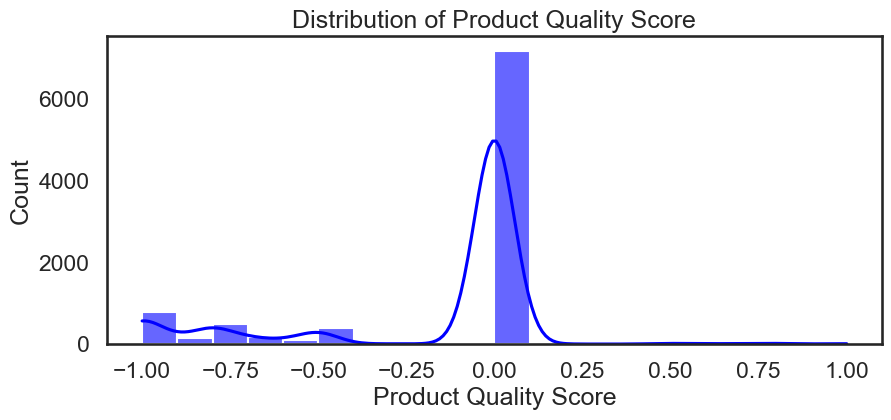

In [57]:
plt.figure(figsize=(10, 4))

# Histogram + KDE for product_quality_score
sns.histplot(data=df, x="product_quality_score", kde=True, color="blue", alpha=0.6, bins=20)
plt.title("Distribution of Product Quality Score")
plt.xlabel("Product Quality Score")
plt.ylabel("Count")
plt.show()

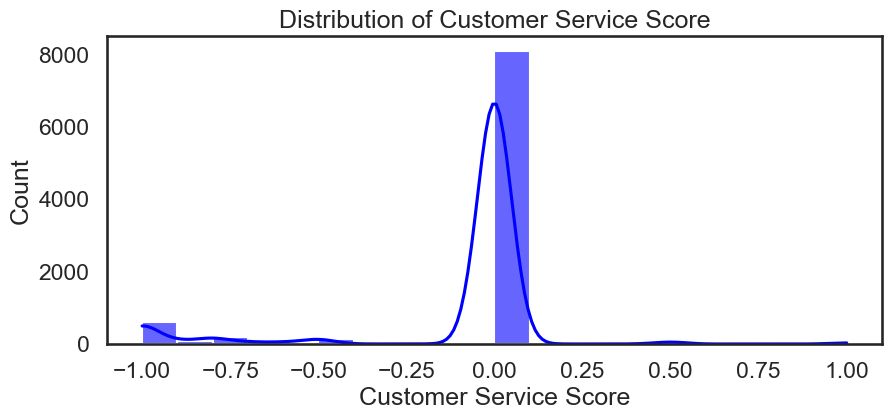

In [58]:
plt.figure(figsize=(10, 4))

# Histogram + KDE for product_quality_score
sns.histplot(data=df, x="customer_service_score", kde=True, color="blue", alpha=0.6, bins=20)
plt.title("Distribution of Customer Service Score")
plt.xlabel("Customer Service Score")
plt.ylabel("Count")
plt.show()

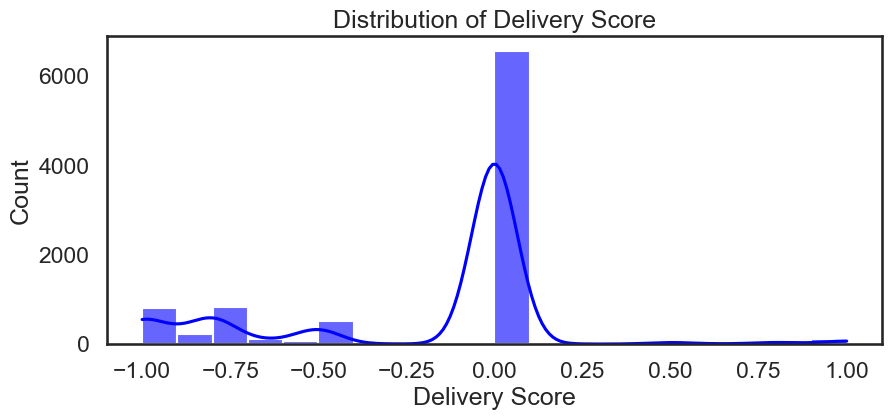

In [73]:
plt.figure(figsize=(10, 4))

# Histogram + KDE for product_quality_score
sns.histplot(data=df, x="delivery_score", kde=True, color="blue", alpha=0.6, bins=20)
plt.title("Distribution of Delivery Score")
plt.xlabel("Delivery Score")
plt.ylabel("Count")
plt.show()

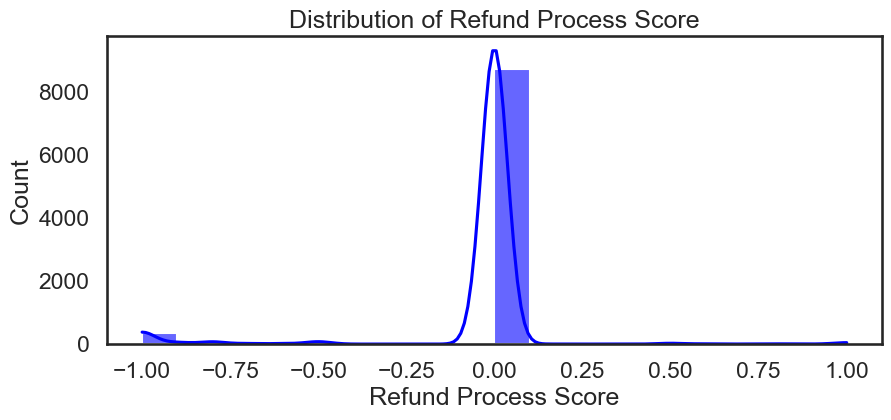

In [74]:
plt.figure(figsize=(10, 4))

# Histogram + KDE for product_quality_score
sns.histplot(data=df, x="refund_process_score", kde=True, color="blue", alpha=0.6, bins=20)
plt.title("Distribution of Refund Process Score")
plt.xlabel("Refund Process Score")
plt.ylabel("Count")
plt.show()

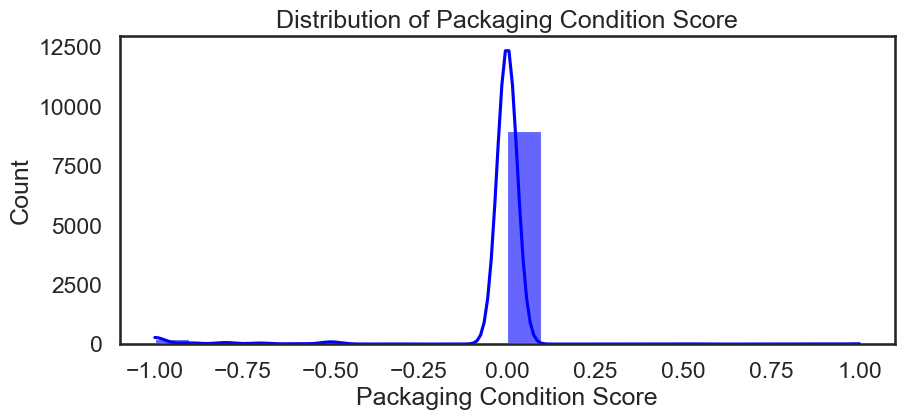

In [75]:
plt.figure(figsize=(10, 4))

# Histogram + KDE for product_quality_score
sns.histplot(data=df, x="packaging_condition_score", kde=True, color="blue", alpha=0.6, bins=20)
plt.title("Distribution of Packaging Condition Score")
plt.xlabel("Packaging Condition Score")
plt.ylabel("Count")
plt.show()

# Boxplot of Scores by Product Category

/var/folders/by/9rlgy7dn18s8rh2tjztwb6jc0000gn/T/ipykernel_19749/576689033.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=filtered, x="product_category_name_en", y="product_quality_score", palette="Set3")


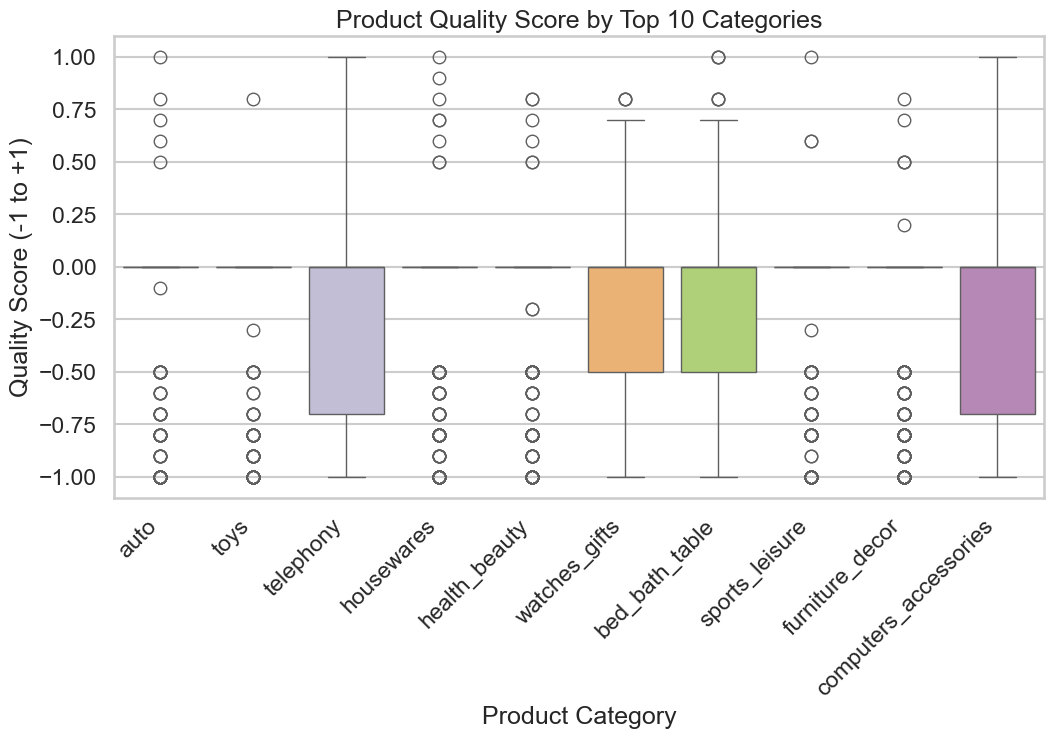

In [51]:
top_categories = (
    df["product_category_name_en"]
    .value_counts()
    .head(10)  # pick top N categories to keep the plot tidy
    .index
)

filtered = df[df["product_category_name_en"].isin(top_categories)]

plt.figure(figsize=(12, 6))
sns.boxplot(data=filtered, x="product_category_name_en", y="product_quality_score", palette="Set3")
plt.xticks(rotation=45, ha="right")
plt.title("Product Quality Score by Top 10 Categories")
plt.xlabel("Product Category")
plt.ylabel("Quality Score (-1 to +1)")
plt.show()

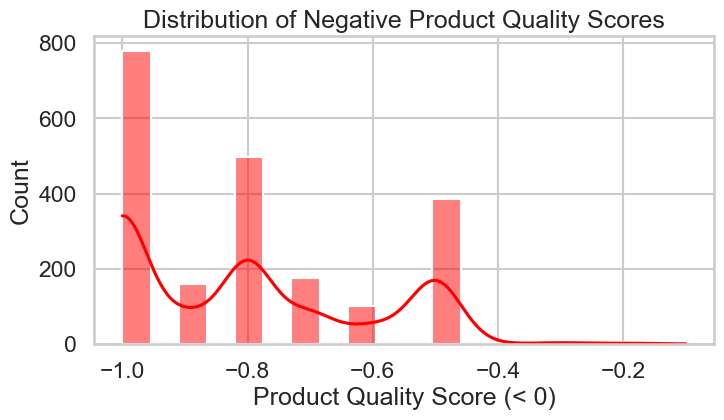

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter to negative product quality scores
df_neg = df[df["product_quality_score"] < 0]

# Plot distribution of negative product_quality_score
plt.figure(figsize=(8,4))
sns.histplot(data=df_neg, x="product_quality_score", kde=True, color="red", bins=20)
plt.title("Distribution of Negative Product Quality Scores")
plt.xlabel("Product Quality Score (< 0)")
plt.ylabel("Count")
plt.show()

# Heatmap: Product Quality vs. Customer Service

/var/folders/by/9rlgy7dn18s8rh2tjztwb6jc0000gn/T/ipykernel_19749/678898422.py:8: UserWarning: 

`shade_lowest` has been replaced by `thresh`; setting `thresh=0.05.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(


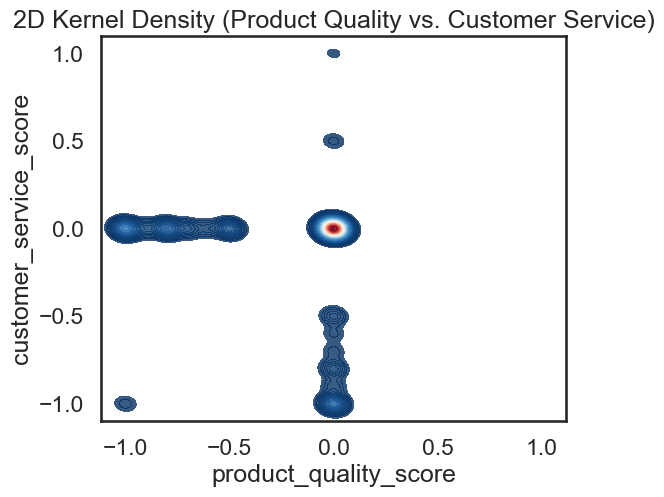

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("white")  # or "whitegrid"
sns.set_context("talk") # slightly larger font sizes

plt.figure(figsize=(6,5))
sns.kdeplot(
    data=df,
    x="product_quality_score",
    y="customer_service_score",
    fill=True,           
    cmap="RdBu_r",         # or "rocket", "viridis", "plasma", "RdBu_r", etc.
    levels=40,          # more levels => smoother color transitions
    bw_adjust=0.5,
    shade_lowest=False, # omit the darkest shading where density is near 0
    alpha=0.8           # slight transparency if you want to see gridlines
)
plt.title("2D Kernel Density (Product Quality vs. Customer Service)")
plt.show()

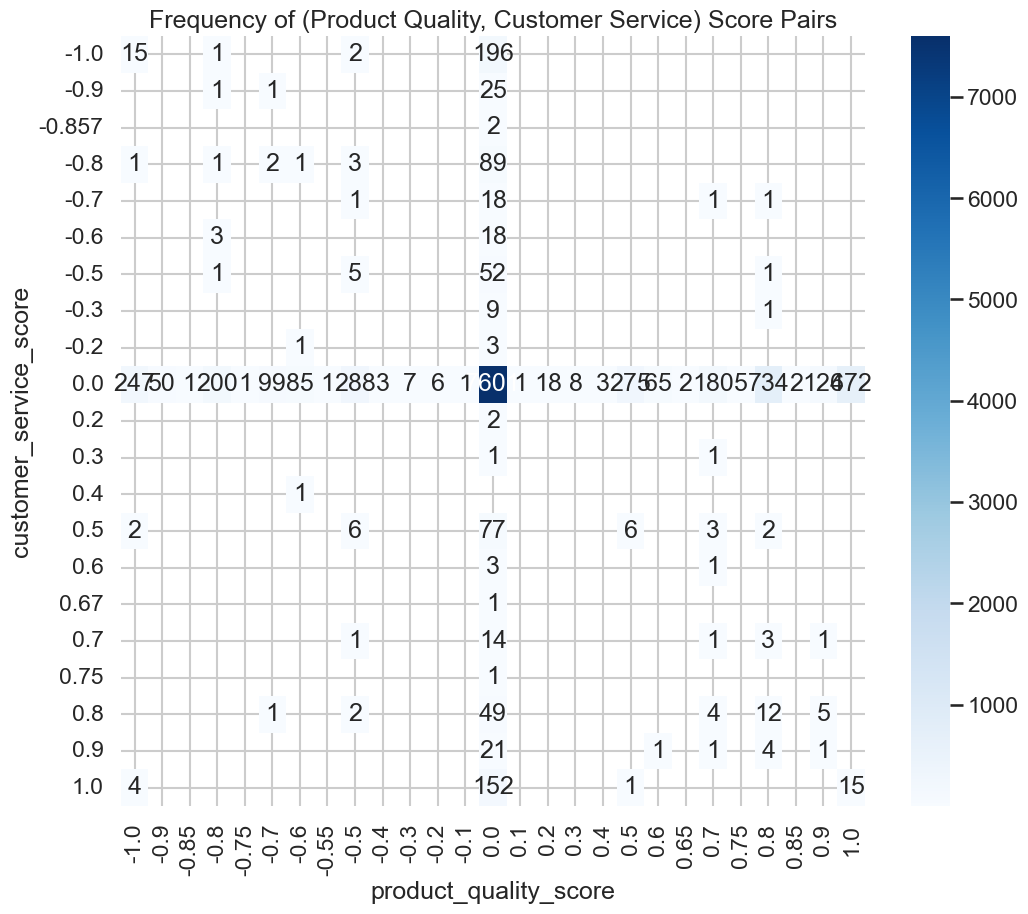

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

freq_df = (
  df.groupby(["product_quality_score", "customer_service_score"])
    .size()
    .reset_index(name="count")
)

freq_pivot = freq_df.pivot(
  index="customer_service_score",
  columns="product_quality_score",
  values="count"
)

plt.figure(figsize=(12,10))
sns.heatmap(freq_pivot, annot=True, fmt=".0f", cmap="Blues")
plt.title("Frequency of (Product Quality, Customer Service) Score Pairs")
plt.show()

# Heatmap of Average Scores by Category & City

In [71]:
def create_heatmap_city_category(df, score_type, title_part, min_reviews=5):
    # 1) Group by (category, city) and compute both mean and count
    df_grouped = (
        df
        .groupby(["product_category_name_en", "city"], as_index=False)
        .agg(
            reviews_count=(score_type, "count"),
            avg_score=(score_type, "mean")
        )
    )
    
    # 2) Pivot for counts and means
    pivot_count = df_grouped.pivot(
        index="product_category_name_en",
        columns="city",
        values="reviews_count"
    )
    pivot_mean = df_grouped.pivot(
        index="product_category_name_en",
        columns="city",
        values="avg_score"
    )
    
    # 3a) Keep only top 10 cities (columns)
    top10_cities = df["city"].value_counts().head(10).index
    pivot_count = pivot_count[top10_cities]  # keep columns only for top 10
    pivot_mean = pivot_mean[top10_cities]
    
    # 3b) Keep only top 10 categories (rows)
    top10_cats = df["product_category_name_en"].value_counts().head(10).index
    pivot_count = pivot_count.loc[top10_cats]  # keep rows only for top 10 categories
    pivot_mean = pivot_mean.loc[top10_cats]
    
    # 4) Hide cells with fewer than min_reviews
    pivot_mean = pivot_mean.where(pivot_count > min_reviews, float("nan"))
    
    # 5) Create the heatmap
    plt.figure(figsize=(10, 10))
    sns.heatmap(
        pivot_mean, 
        annot=False, 
        cmap="RdBu", 
        center=0, 
        linewidths=.5
    )
    plt.title(f"Average {title_part} by (Category, City) - Only Cells w/ > {min_reviews} Reviews")
    plt.xlabel("City")
    plt.ylabel("Product Category")
    plt.show()

In [63]:
def create_heatmap_city_category(df, score_type, title_part, min_reviews=5):
    # 1) Group by (category, city) and compute both mean and count
    df_grouped = (
        df
        .groupby(["product_category_name_en", "city"], as_index=False)
        .agg(
            reviews_count=(score_type, "count"),
            avg_score=(score_type, "mean")
        )
    )
    
    # 2) Pivot twice: one for counts, one for means
    pivot_count = df_grouped.pivot(
        index="product_category_name_en",
        columns="city",
        values="reviews_count"
    )
    pivot_mean = df_grouped.pivot(
        index="product_category_name_en",
        columns="city",
        values="avg_score"
    )
    
    # 3) Because you might have many cities, let's pick top 10 by overall frequency
    top10_cities = df["city"].value_counts().head(10).index
    pivot_count = pivot_count[top10_cities]  # keep only top 10 columns
    pivot_mean = pivot_mean[top10_cities]
    
    # 4) Replace any cells with fewer than min_reviews with NaN in pivot_mean
    pivot_mean = pivot_mean.where(pivot_count > min_reviews, np.nan)
    
    # 5) Create the heatmap
    plt.figure(figsize=(30, 30))
    sns.heatmap(
        pivot_mean, 
        annot=False, 
        cmap="RdBu", 
        center=0, 
        linewidths=.5
    )
    plt.title(f"Average {title_part} by (Category, City) - Only Cells with > {min_reviews} Reviews")
    plt.xlabel("City")
    plt.ylabel("Product Category")
    plt.show()

In [59]:
def create_heatmap_city_category(df, score_type, title_part):

    pivot_df = (
        df
        .groupby(["product_category_name_en", "city"], as_index=False)
        .agg({score_type: "mean"})
        .pivot(index="product_category_name_en", columns="city", values=score_type)
    )

    # Because you might have many cities, let's pick top 10 by count
    top10_cities = df["city"].value_counts().head(10).index
    pivot_df = pivot_df[top10_cities]  # keep columns only for top 10 cities

    plt.figure(figsize=(30, 30))
    sns.heatmap(pivot_df, annot=False, cmap="RdBu", center=0, linewidths=.5)
    plt.title("Average " + title_part + " by (Category, City)")
    plt.xlabel("City")
    plt.ylabel("Product Category")
    plt.show()

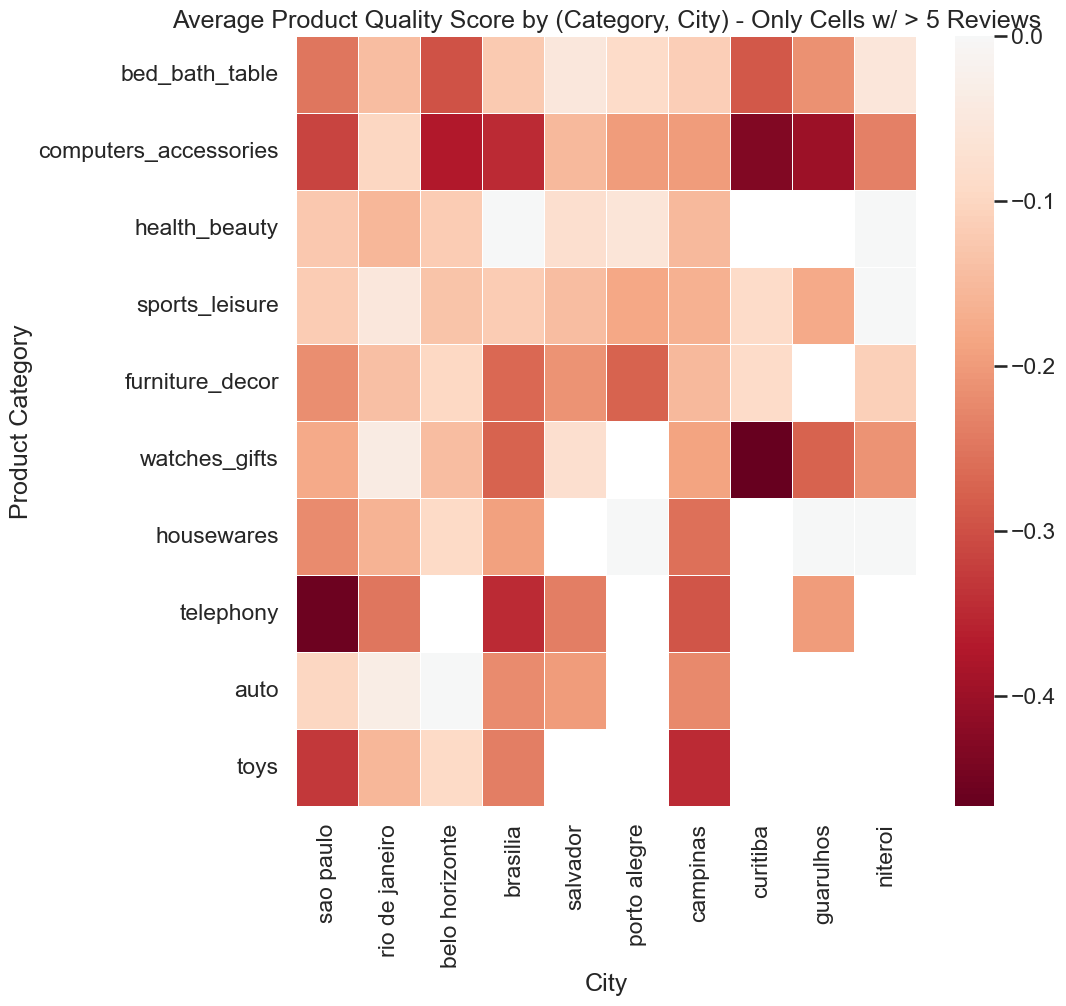

In [72]:
create_heatmap_city_category(df, "product_quality_score", "Product Quality Score")

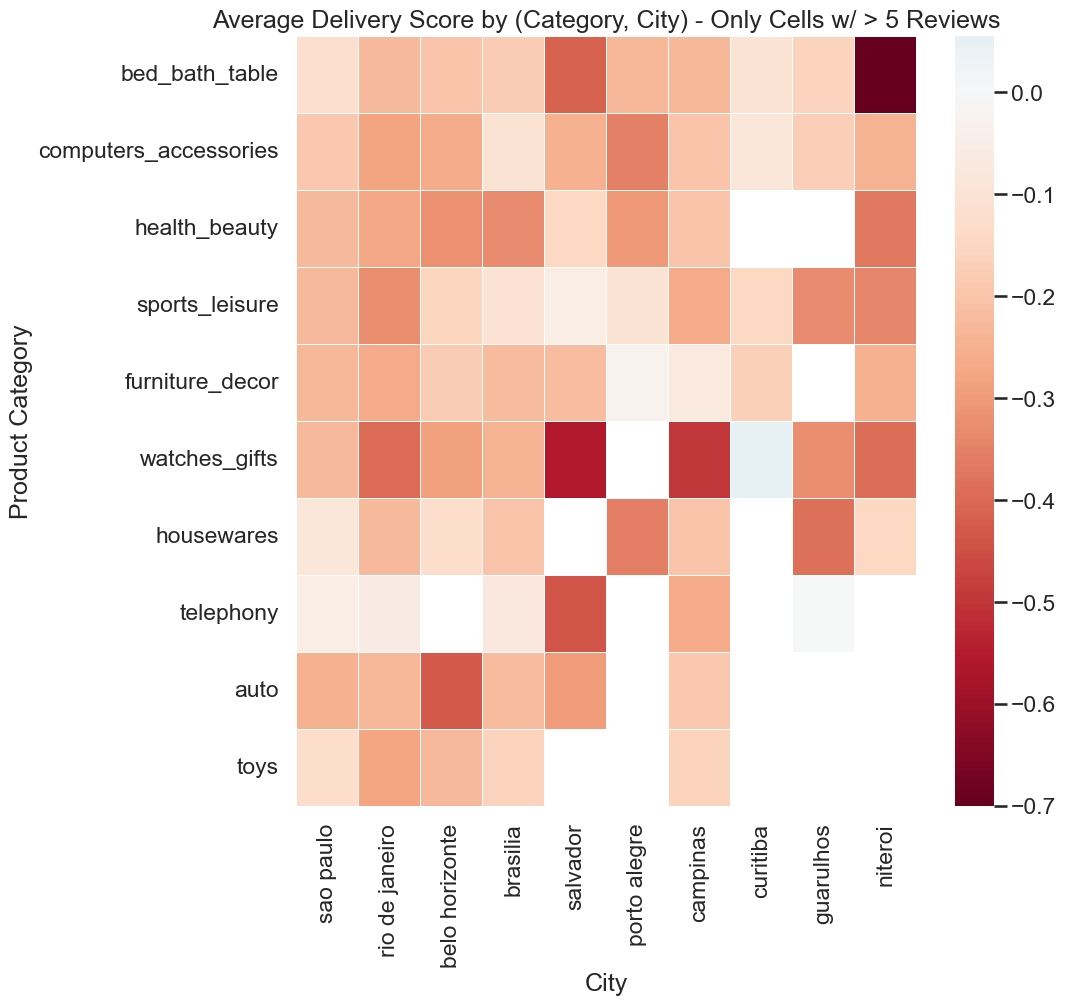

In [76]:
create_heatmap_city_category(df, "delivery_score", "Delivery Score")

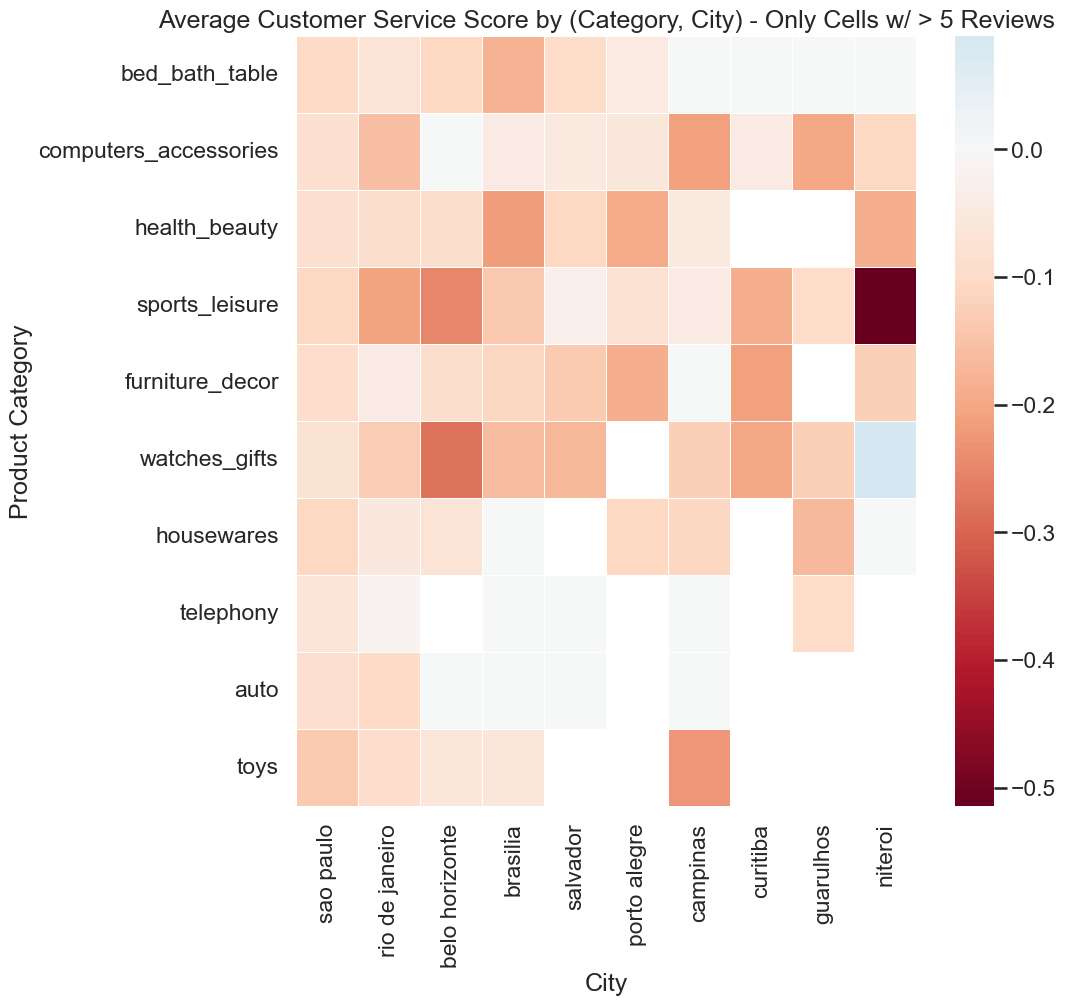

In [77]:
create_heatmap_city_category(df, "customer_service_score", "Customer Service Score")

In [80]:
# Allow longer (or unlimited) column width
pd.set_option('display.max_colwidth', None) 

# Let's say your full reviews data is in df_reviews
df_filtered = df[
    (df["product_category_name_en"] == "sports_leisure") &
    (df["city"] == "niteroi")
]

# Now df_filtered contains only rows for 'housewares' in 'rio de janeiro'.
# Inspect columns of interest, like aspect scores or review text:
df_filtered[[
    "review_id",
    "review_comment_message_en",
    "product_quality_score",
    "delivery_score",
    "refund_process_score",
    "customer_service_score",
    "city",
    "product_category_name_en"
]].head(20)

,review_id,review_comment_message_en,product_quality_score,delivery_score,refund_process_score,customer_service_score,city,product_category_name_en
6836,9364ac5f9db46b2ea389cea4e5389529,The product has not arrived yet!!!!,0.0,0.0,0.0,0.0,niteroi,sports_leisure
7056,7eb5d8e6c3915c86958d7d7be6b1c95c,"I received an email stating ""Unforeseen event during the delivery of the order"" but I had no contact other than automatic emails. I want to know what happened with the delivery and I want my money back.",0.0,0.0,-1.0,0.0,niteroi,sports_leisure
7127,f495b89455116ac326d54a32ee939a00,Good evening The product was not delivered and I haven't even received an explanation yet. I would like assistance regarding this situation. Thank you!,0.0,-1.0,0.0,-1.0,niteroi,sports_leisure
7184,75b989e088c5e0935915936df0885c9d,"It's been 26 days in transit and so far, nothing... I find Stark's communication system very difficult, there should be an easier way to make complaints!",0.0,-0.9,0.0,-0.6,niteroi,sports_leisure
7242,9386623e4633ecab3bac4782dbded49c,"I bought the product and so far nothing, they say it's at the post office, if I had to go somewhere to pick it up, I would have bought it at a physical store",0.0,-0.5,0.0,0.0,niteroi,sports_leisure
7262,ceb0ed8e3dbbea01d9b79a531140f9f0,"I bought a whey protein and a creatine and only the whey was delivered, it's been a week since the whey was delivered and no explanation from the store was given, and they didn't even respond to the message I sent.",0.0,0.0,0.0,-1.0,niteroi,sports_leisure
7274,a773df5369a81d1169ee8c056aa4f783,"GOOD MORNING, THIS IS THE FOURTH TIME I AM REQUESTING THE RETURN OF THE PRODUCT AND SO FAR I HAVE NOT HAD A RESPONSE, AS THE MEASURES OF THE BAG ARE NOT THE SAME AS DECLARED AT THE TIME OF PURCHASE. GT. KEYLA",0.0,0.0,-1.0,-1.0,niteroi,sports_leisure


In [ ]:
create_heatmap_city_category(df, "delivery_score", "Delivery Score")

# Trend Over Time

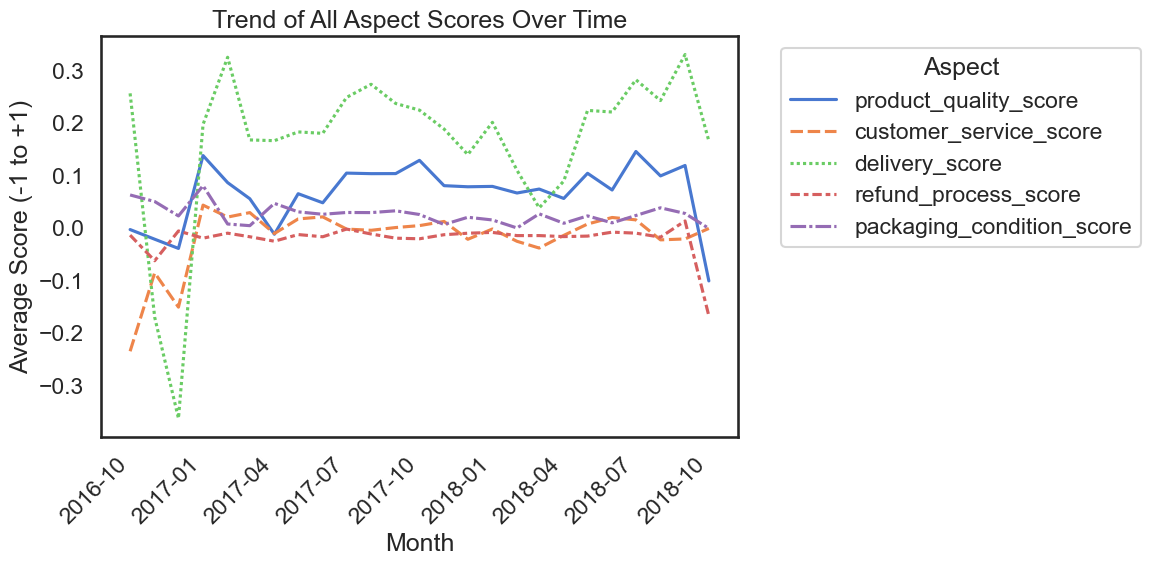

In [27]:
df["review_month_date"] = pd.to_datetime(df["review_month_date"])

time_df = (
    df
    .groupby("review_month_date", as_index=False)
    .agg({
        'product_quality_score': 'mean',
        'customer_service_score': 'mean',
        'delivery_score': 'mean',
        'refund_process_score': 'mean',
        'packaging_condition_score': 'mean'
    })
)

plt.figure(figsize=(12, 6))
sns.lineplot(data=time_df.melt(id_vars='review_month_date', var_name='aspect', value_name='score'),
            x="review_month_date", 
            y="score", 
            hue="aspect",
            style="aspect")

plt.xticks(rotation=45, ha='right')  # Rotate x labels 45 degrees and align to the right
plt.title("Trend of All Aspect Scores Over Time")
plt.xlabel("Month")
plt.ylabel("Average Score (-1 to +1)")
plt.legend(title="Aspect", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  # This will adjust spacing to prevent label cutoff
plt.show()

# Pairplot (if you add more aspect columns)

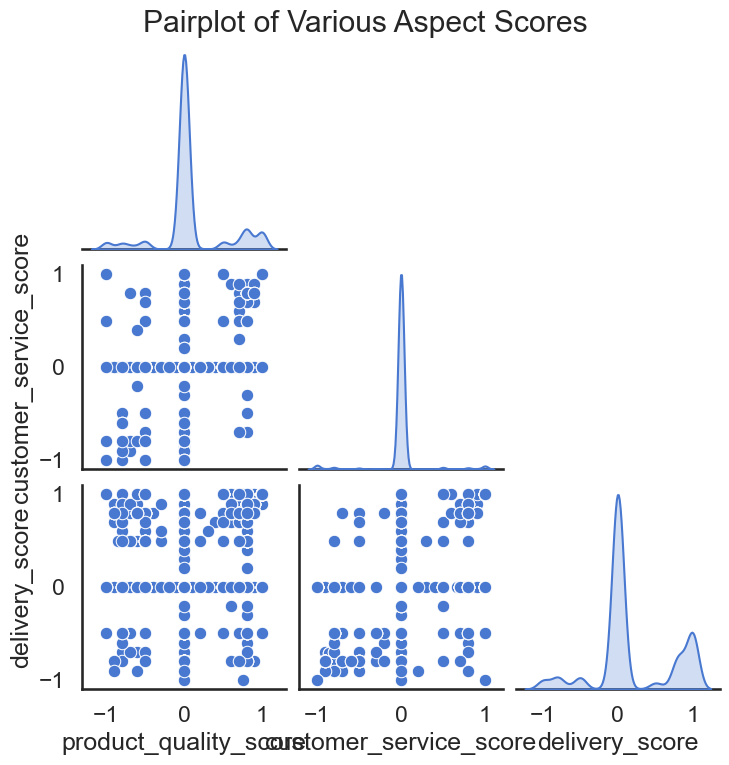

In [28]:
sns.pairplot(
    df[["product_quality_score", "customer_service_score", "delivery_score"]].dropna(),
    diag_kind="kde",
    corner=True
)
plt.suptitle("Pairplot of Various Aspect Scores", y=1.02)
plt.show()

/Users/d.lucker/Code/correlion/airflow_demo/venv/lib/python3.9/site-packages/seaborn/axisgrid.py:1615: UserWarning: 

`shade_lowest` has been replaced by `thresh`; setting `thresh=0.05.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=x, y=y, **kwargs)
/Users/d.lucker/Code/correlion/airflow_demo/venv/lib/python3.9/site-packages/seaborn/axisgrid.py:1615: UserWarning: 

`shade_lowest` has been replaced by `thresh`; setting `thresh=0.05.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=x, y=y, **kwargs)
/Users/d.lucker/Code/correlion/airflow_demo/venv/lib/python3.9/site-packages/seaborn/axisgrid.py:1615: UserWarning: 

`shade_lowest` has been replaced by `thresh`; setting `thresh=0.05.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=x, y=y, **kwargs)


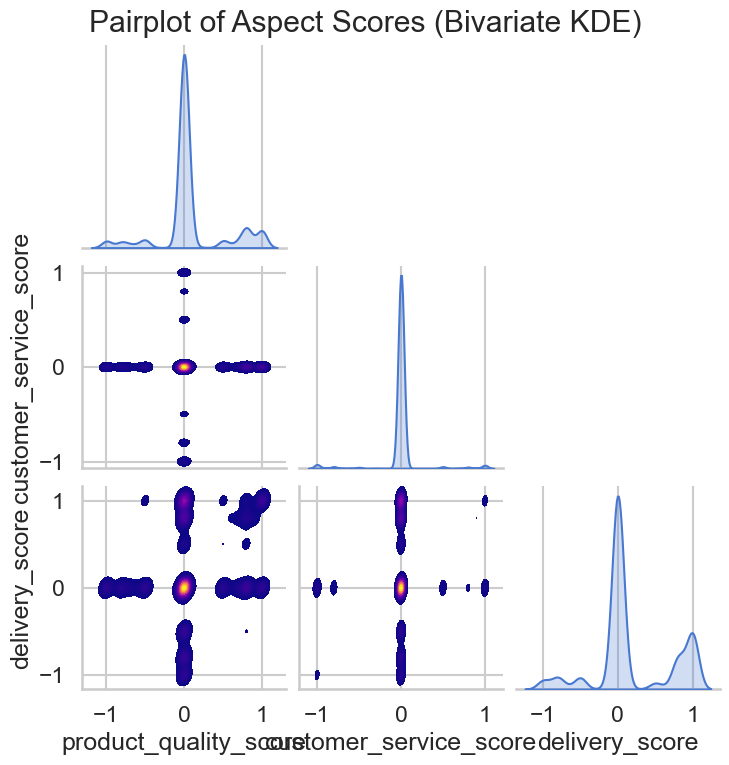

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

df_subset = df[["product_quality_score", "customer_service_score", "delivery_score"]].dropna()

sns.set_style("whitegrid")
g = sns.pairplot(
    data=df_subset,
    kind="kde",           # bivariate KDE on off-diagonals
    diag_kind="kde",      # 1D KDE on diagonals
    corner=True,          # lower triangle only
    plot_kws={
        "fill": True,           # fill the contours
        "levels": 30,           # more contour lines for that "topographic" look
        "cmap": "plasma",         # or your favorite colormap
        "shade_lowest": False,  # skip the darkest outer area
        "bw_adjust": 0.5,       # tweak smoothing
    }
)

# Adjust the PairGrid figure
g.fig.suptitle("Pairplot of Aspect Scores (Bivariate KDE)", y=1.02)
plt.show()